# Attendance Data evaluation and prediction

## Basic Setup and Imports

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## Pull in the data
- 2019-2013 data
- Combine data

In [2]:
games_h2h_2019 = pd.read_csv('Data/usa-mls-matches-2019-to-2019-stats.csv')
games_h2h_2018 = pd.read_csv('Data/usa-mls-matches-2018-to-2018-stats.csv')
games_h2h_2017 = pd.read_csv('Data/usa-mls-matches-2017-to-2017-stats.csv')
games_h2h_2016 = pd.read_csv('Data/usa-mls-matches-2016-to-2016-stats.csv')
games_h2h_2015 = pd.read_csv('Data/usa-mls-matches-2015-to-2015-stats.csv')
games_h2h_2014 = pd.read_csv('Data/usa-mls-matches-2014-to-2014-stats.csv')
games_h2h_2013 = pd.read_csv('Data/usa-mls-matches-2013-to-2013-stats.csv')
games_h2h_combined = games_h2h_2019.append(games_h2h_2018).append(games_h2h_2017).append(games_h2h_2016).append(games_h2h_2015).append(games_h2h_2014).append(games_h2h_2013)
stadiums = pd.read_csv('Data/stadiums.csv')

## Preview Data

In [3]:
games_h2h_combined.head(20)

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_goal_timings,away_team_goal_timings,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
0,1551549600,Mar 2 2019 - 6:00pm,complete,16498.0,Philadelphia Union,Toronto,0.0,0.0,2.06,1.25,1,3,4,1,0,1,73,"45'3,62,90'4",8,1,2,0,2,0,20,8,3,5,17,3,14,11,61,39,0.0,0,0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,Talen Energy Stadium
1,1551555000,Mar 2 2019 - 7:30pm,complete,25527.0,Orlando City,New York City,0.0,0.0,1.24,1.53,2,2,4,2,0,2,"59,75","13,45",2,4,3,0,2,0,15,19,6,8,9,11,9,10,56,44,0.0,0,0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,Orlando City Stadium
2,1551562200,Mar 2 2019 - 9:30pm,complete,17931.0,Columbus Crew,New York RB,0.0,0.0,1.35,1.00,1,1,2,2,1,1,41,6,9,3,4,0,2,0,12,12,5,5,7,7,-1,-1,53,47,0.0,0,0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,MAPFRE Stadium
3,1551562200,Mar 2 2019 - 9:30pm,complete,14327.0,FC Dallas,New England Revolution,0.0,0.0,2.12,0.94,1,1,2,1,1,0,13,57,3,1,2,0,2,0,11,11,4,4,7,7,13,22,62,38,0.0,0,0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,Toyota Stadium
4,1551567600,Mar 2 2019 - 11:00pm,complete,27837.0,Vancouver Whitecaps,Minnesota United,0.0,0.0,1.18,1.00,2,3,5,2,1,1,"6,81","37,66,70",6,2,2,0,3,0,13,16,6,6,7,10,11,17,53,47,0.0,0,0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,BC Place Stadium
5,1551567600,Mar 2 2019 - 11:00pm,complete,16827.0,Houston Dynamo,Real Salt Lake,0.0,0.0,2.00,0.89,1,1,2,1,0,1,62,40,9,8,2,1,4,0,10,15,3,6,7,9,11,9,52,48,0.0,0,0,0,0,0,0,0,0.0,0.0,1.23,5.70,11.25,1.2,1.67,2.65,0.0,2.10,1.67,BBVA Compass Stadium
6,1551567600,Mar 2 2019 - 11:00pm,complete,12717.0,Colorado Rapids,Portland Timbers,0.0,0.0,1.71,1.17,3,3,6,3,1,2,"16,46,90'4","29,45'1,66",4,17,0,1,2,0,11,20,5,5,6,15,10,13,42,58,0.0,0,0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,Dick's Sporting Goods Park
7,1551574800,Mar 3 2019 - 1:00am,complete,25866.0,LA Galaxy,Chicago Fire,0.0,0.0,2.00,0.65,2,1,3,0,0,0,"68,80",49,9,7,1,0,1,0,13,16,7,5,6,11,6,7,47,53,0.0,0,0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,Dignity Health Sports Park (Carson- California)
8,1551582000,Mar 3 2019 - 3:00am,complete,18000.0,SJ Earthquakes,Montreal Impact,0.0,0.0,1.88,0.82,1,2,3,3,1,2,11,"29,44",7,6,3,0,4,0,12,11,5,4,7,7,16,13,59,41,0.0,0,0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,Avaya Stadium
9,1551582000,Mar 3 2019 - 3:00am,complete,39011.0,Seattle Sounders,FC Cincinnati,0.0,0.0,2.30,0.71,4,1,5,4,3,1,"27,33,43,87",13,6,1,0,0,1,0,25,8,11,4,14,4,6,13,58,42,0.0,0,0,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,CenturyLink Field


## Creating a Pivot table to visualize Head-2-Head attendance
- Use [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) with 
 - index of home team, 
 - columns of away teams 
 - and attendance being the values
 - np.mean as the aggregate function
- Increase figure size for visibility of all data points
- Use [Seaborn Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) to visualize data 
 

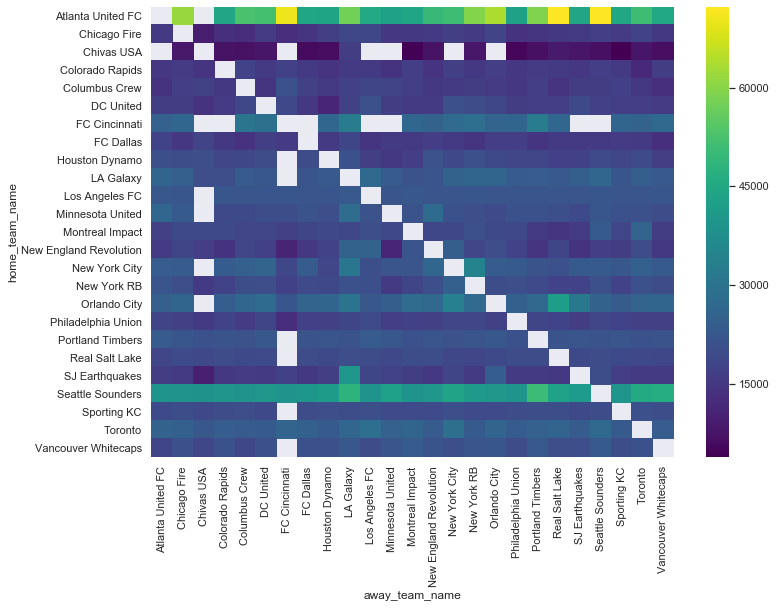

In [4]:
table = pd.pivot_table(games_h2h_combined, values='attendance', index='home_team_name', columns=['away_team_name'], aggfunc=np.mean)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(table, cmap='viridis')


... or you can also use cool/warm color mapping

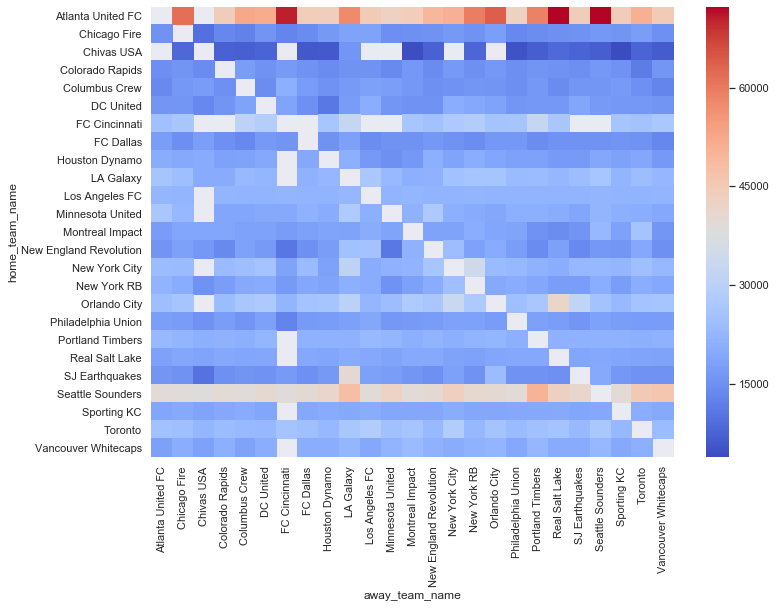

In [5]:
sns.heatmap(table, cmap='coolwarm')

# Homework
- Take max stadium capacity into account
- Normalize for it
- Visualize again

In [6]:
games_h2h_combined.stadium_name.unique()

array(['Talen Energy Stadium', 'Orlando City Stadium', 'MAPFRE Stadium',
       'Toyota Stadium', 'BC Place Stadium', 'BBVA Compass Stadium',
       "Dick's Sporting Goods Park",
       'Dignity Health Sports Park (Carson- California)', 'Avaya Stadium',
       'CenturyLink Field', 'Audi Field', 'Banc of California Stadium',
       'SeatGeek Stadium (Bridgeview- Illinois)', 'Gillette Stadium',
       'Rio Tinto Stadium', 'Yankee Stadium', "Children's Mercy Park",
       'Mercedes-Benz Stadium', 'Red Bull Arena',
       'Nippert Stadium (Cincinnati- Ohio)', 'BMO Field', 'Stade Saputo',
       'Allianz Field (Saint Paul- Minnesota)',
       'BC Place Stadium (Vancouver- British Columbia)',
       'Stade Saputo (Montreal- Quebec)',
       'Mercedes-Benz Stadium (Atlanta- Georgia)',
       'Red Bull Arena (Harrison- New Jersey)',
       'MAPFRE Stadium (Columbus- Ohio)',
       'Toyota Stadium (Frisco- Texas)',
       'Audi Field (Washington- District of Columbia)',
       'BBVA Compass Sta

## Reading in stadium details

In [7]:
stadiums = pd.read_csv('Data/stadiums.csv')
stadiums

,name,capacity_mls,capacity_total,capacity_exandable_to,attendance_record,surface,city,state,country
0,Allianz Field (Saint Paul- Minnesota),19400,NaN,NaN,NaN,grass,St. Paul,Minnesota,USA
1,Audi Field,20000,NaN,NaN,NaN,grass,Washington,D.C.,USA
2,Audi Field (Washington- District of Columbia),20000,NaN,NaN,NaN,grass,Washington,D.C.,USA
3,Avaya Stadium,18000,NaN,NaN,NaN,grass,San Jose,California,USA
4,Avaya Stadium (San Jose- California),18000,NaN,NaN,NaN,grass,San Jose,California,USA
5,Banc of California Stadium,22000,NaN,NaN,NaN,grass,Los Angeles,California,USA
6,Banc of California Stadium (Los Angeles- Calif...,22000,NaN,NaN,NaN,grass,Los Angeles,California,USA
7,BBVA Compass Stadium,22039,NaN,NaN,NaN,grass,Houston,Texas,USA
8,BBVA Compass Stadium (Houston- Texas),22039,NaN,NaN,NaN,grass,Houston,Texas,USA
9,BBVA Stadium (Houston- Texas),22039,NaN,NaN,NaN,grass,Houston,Texas,USA


## Merging games with Stadium details

In [8]:
games_and_stadium_details = pd.merge(games_h2h_combined, stadiums, left_on='stadium_name', right_on='name', how='left')
games_and_stadium_details

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_goal_timings,away_team_goal_timings,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name,name,capacity_mls,capacity_total,capacity_exandable_to,attendance_record,surface,city,state,country
0,1551549600,Mar 2 2019 - 6:00pm,complete,16498.0,Philadelphia Union,Toronto,0.00,0.00,2.06,1.25,1,3,4,1,0,1,73,"45'3,62,90'4",8,1,2,0,2,0,20,8,3,5,17,3,14,11,61,39,0.00,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,Talen Energy Stadium,Talen Energy Stadium,18500,NaN,NaN,NaN,grass,Chester,Pennsylvania,USA
1,1551555000,Mar 2 2019 - 7:30pm,complete,25527.0,Orlando City,New York City,0.00,0.00,1.24,1.53,2,2,4,2,0,2,"59,75","13,45",2,4,3,0,2,0,15,19,6,8,9,11,9,10,56,44,0.00,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,Orlando City Stadium,Orlando City Stadium,25500,NaN,NaN,NaN,grass,Orlando,Florida,USA
2,1551562200,Mar 2 2019 - 9:30pm,complete,17931.0,Columbus Crew,New York RB,0.00,0.00,1.35,1.00,1,1,2,2,1,1,41,6,9,3,4,0,2,0,12,12,5,5,7,7,-1,-1,53,47,0.00,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,MAPFRE Stadium,MAPFRE Stadium,19968,NaN,NaN,NaN,grass,Columbus,Ohio,USA
3,1551562200,Mar 2 2019 - 9:30pm,complete,14327.0,FC Dallas,New England Revolution,0.00,0.00,2.12,0.94,1,1,2,1,1,0,13,57,3,1,2,0,2,0,11,11,4,4,7,7,13,22,62,38,0.00,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,Toyota Stadium,Toyota Stadium,20500,NaN,NaN,NaN,grass,Frisco,Texas,USA
4,1551567600,Mar 2 2019 - 11:00pm,complete,27837.0,Vancouver Whitecaps,Minnesota United,0.00,0.00,1.18,1.00,2,3,5,2,1,1,"6,81","37,66,70",6,2,2,0,3,0,13,16,6,6,7,10,11,17,53,47,0.00,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,BC Place Stadium,BC Place Stadium,22120,54500.0,NaN,NaN,turf,Vancouver,British Columbia,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,1384025400,Nov 9 2013 - 7:30pm,complete,22107.0,Houston Dynamo,Sporting KC,1.84,1.56,1.80,1.53,0,0,0,0,0,0,NaN,NaN,4,1,0,0,0,0,11,13,8,7,3,6,11,12,55,45,2.27,49,65,46,19,6,30,57,11.53,3.65,2.40,3.23,3.29,0.0,0.0,0.0,0.0,0.0,0.0,BBVA Compass Stadium,BBVA Compass Stadium,22039,NaN,NaN,NaN,grass,Houston,Texas,USA
2589,1384135200,Nov 11 2013 - 2:00am,complete,17333.0,Real Salt Lake,Portland Timbers,2.06,1.22,2.11,1.16,4,2,6,3,2,1,"35,41,48,82","14,90'4",7,3,0,0,1,0,8,3,3,2,5,1,13,12,49,51,2.75,62,84,50,31,12,25,67,10.51,3.83,2.13,3.38,3.78,0.0,0.0,0.0,0.0,0.0,0.0,Rio Tinto Stadium,Rio Tinto Stadium,20213,NaN,NaN,NaN,grass,Sandy,Utah,USA
2590,1385253000,Nov 24 2013 - 12:30am,complete,21650.0,Sporting KC,Houston Dynamo,1.83,1.28,1.85,1.21,2,1,3,2,1,1,"14,63",3,4,1,0,0,2,0,9,8,3,2,6,6,14,14,53,47,2.56,47,78,45,23,14,28,70,10.86,2.94,1.81,3.52,5.15,0.0,0.0,0.0,0.0,0.0,0.0,Children's Mercy Park,Children's Mercy Park,18467,NaN

## Calculating attendance percentage against capacity

In [9]:
games_and_stadium_details['capacity_percentage'] = games_and_stadium_details['attendance']/games_and_stadium_details['capacity_mls']
games_and_stadium_details

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_goal_timings,away_team_goal_timings,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name,name,capacity_mls,capacity_total,capacity_exandable_to,attendance_record,surface,city,state,country,capacity_percentage
0,1551549600,Mar 2 2019 - 6:00pm,complete,16498.0,Philadelphia Union,Toronto,0.00,0.00,2.06,1.25,1,3,4,1,0,1,73,"45'3,62,90'4",8,1,2,0,2,0,20,8,3,5,17,3,14,11,61,39,0.00,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,Talen Energy Stadium,Talen Energy Stadium,18500,NaN,NaN,NaN,grass,Chester,Pennsylvania,USA,0.891784
1,1551555000,Mar 2 2019 - 7:30pm,complete,25527.0,Orlando City,New York City,0.00,0.00,1.24,1.53,2,2,4,2,0,2,"59,75","13,45",2,4,3,0,2,0,15,19,6,8,9,11,9,10,56,44,0.00,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,Orlando City Stadium,Orlando City Stadium,25500,NaN,NaN,NaN,grass,Orlando,Florida,USA,1.001059
2,1551562200,Mar 2 2019 - 9:30pm,complete,17931.0,Columbus Crew,New York RB,0.00,0.00,1.35,1.00,1,1,2,2,1,1,41,6,9,3,4,0,2,0,12,12,5,5,7,7,-1,-1,53,47,0.00,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,MAPFRE Stadium,MAPFRE Stadium,19968,NaN,NaN,NaN,grass,Columbus,Ohio,USA,0.897987
3,1551562200,Mar 2 2019 - 9:30pm,complete,14327.0,FC Dallas,New England Revolution,0.00,0.00,2.12,0.94,1,1,2,1,1,0,13,57,3,1,2,0,2,0,11,11,4,4,7,7,13,22,62,38,0.00,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,Toyota Stadium,Toyota Stadium,20500,NaN,NaN,NaN,grass,Frisco,Texas,USA,0.698878
4,1551567600,Mar 2 2019 - 11:00pm,complete,27837.0,Vancouver Whitecaps,Minnesota United,0.00,0.00,1.18,1.00,2,3,5,2,1,1,"6,81","37,66,70",6,2,2,0,3,0,13,16,6,6,7,10,11,17,53,47,0.00,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,BC Place Stadium,BC Place Stadium,22120,54500.0,NaN,NaN,turf,Vancouver,British Columbia,Canada,1.258454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,1384025400,Nov 9 2013 - 7:30pm,complete,22107.0,Houston Dynamo,Sporting KC,1.84,1.56,1.80,1.53,0,0,0,0,0,0,NaN,NaN,4,1,0,0,0,0,11,13,8,7,3,6,11,12,55,45,2.27,49,65,46,19,6,30,57,11.53,3.65,2.40,3.23,3.29,0.0,0.0,0.0,0.0,0.0,0.0,BBVA Compass Stadium,BBVA Compass Stadium,22039,NaN,NaN,NaN,grass,Houston,Texas,USA,1.003085
2589,1384135200,Nov 11 2013 - 2:00am,complete,17333.0,Real Salt Lake,Portland Timbers,2.06,1.22,2.11,1.16,4,2,6,3,2,1,"35,41,48,82","14,90'4",7,3,0,0,1,0,8,3,3,2,5,1,13,12,49,51,2.75,62,84,50,31,12,25,67,10.51,3.83,2.13,3.38,3.78,0.0,0.0,0.0,0.0,0.0,0.0,Rio Tinto Stadium,Rio Tinto Stadium,20213,NaN,NaN,NaN,grass,Sandy,Utah,USA,0.857517
2590,1385253000,Nov 24 2013 - 12:30am,complete,21650.0,Sporting KC,Houston Dynamo,1.83,1.28,1.85,1.21,2,1,3,2,1,1,"14,63",3,4,1,0,0,2,0,9,8,3,2,6,6,14,14,53,47,2.56,47,78,45,23,14,28,70,10.86,2.94,1.81,

## Plotting percentage against capacity in matchups on heatmap

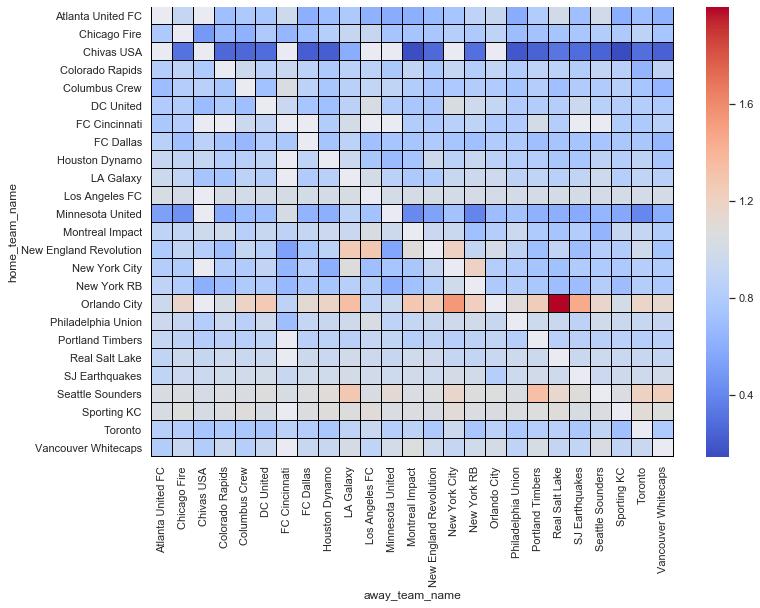

In [10]:
table2 = pd.pivot_table(games_and_stadium_details, values='capacity_percentage', index='home_team_name', columns=['away_team_name'], aggfunc=np.mean)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(table2, cmap='coolwarm', cbar=True, linecolor="black", linewidth=.01)

## Turning this onto the head a little bit to horizontally visualize whether any specific away team is a good draw

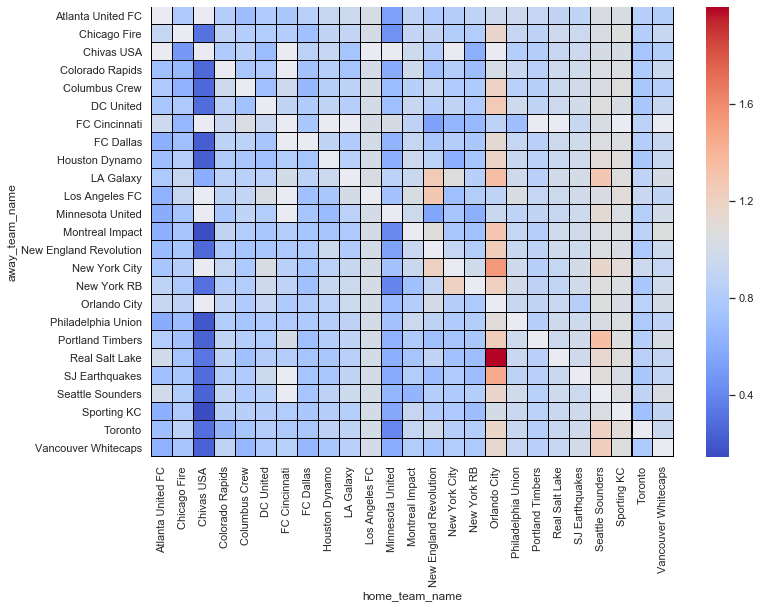

In [11]:
table2 = pd.pivot_table(games_and_stadium_details, values='capacity_percentage', index='away_team_name', columns=['home_team_name'], aggfunc=np.mean)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(table2, cmap='coolwarm', cbar=True, linecolor="black", linewidth=.01)

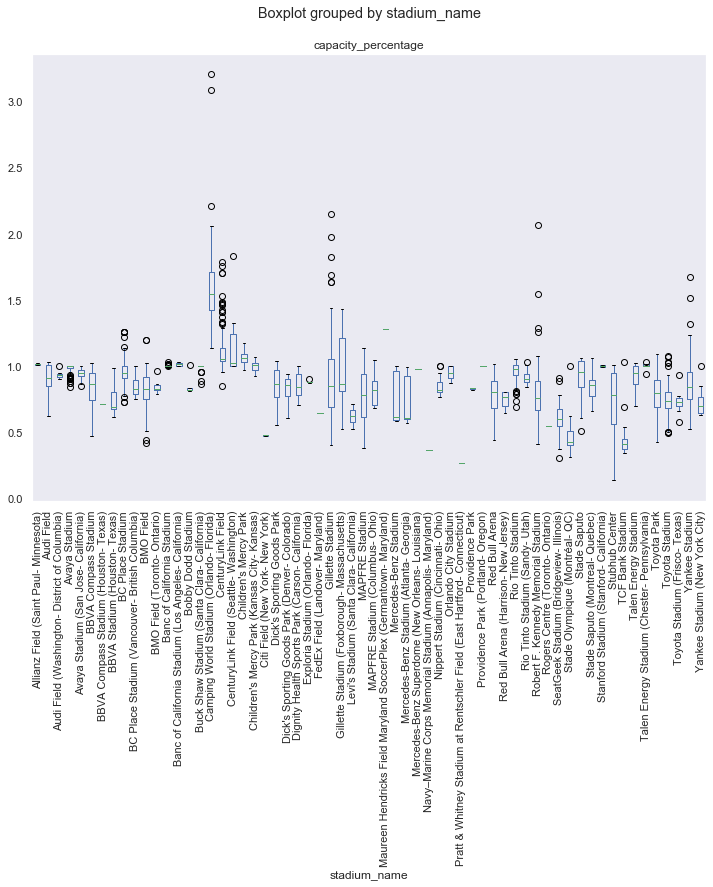

In [18]:
games_and_stadium_details.boxplot(by='stadium_name', 
                       column=['capacity_percentage'], 
                       grid=False,
                       rot=90)

## Playing with the data to see where some of the >1 fall
I.e. why is Orlando so high in some of those numbers

In [12]:
pd.set_option('display.max_rows', None)
over_capacity = games_and_stadium_details.query('capacity_percentage>1')

stripped_down = over_capacity[['date_GMT', 'home_team_name' , 'away_team_name', 'attendance', 'capacity_mls', 'capacity_percentage' , 'stadium_name']]

sorted = stripped_down.sort_values(by=['stadium_name'])

sorted

,date_GMT,home_team_name,away_team_name,attendance,capacity_mls,capacity_percentage,stadium_name
144,May 19 2019 - 12:00am,Minnesota United,Columbus Crew,19600.0,19400,1.010309,Allianz Field (Saint Paul- Minnesota)
269,Jul 28 2019 - 12:00am,Minnesota United,Vancouver Whitecaps,19845.0,19400,1.022938,Allianz Field (Saint Paul- Minnesota)
298,Aug 15 2019 - 12:00am,Minnesota United,Colorado Rapids,19629.0,19400,1.011804,Allianz Field (Saint Paul- Minnesota)
236,Jul 14 2019 - 12:00am,Minnesota United,FC Dallas,19906.0,19400,1.026082,Allianz Field (Saint Paul- Minnesota)
306,Aug 18 2019 - 12:00am,Minnesota United,Orlando City,19738.0,19400,1.017423,Allianz Field (Saint Paul- Minnesota)
360,Sep 15 2019 - 9:30pm,Minnesota United,Real Salt Lake,19635.0,19400,1.012113,Allianz Field (Saint Paul- Minnesota)
214,Jul 4 2019 - 12:00am,Minnesota United,SJ Earthquakes,19653.0,19400,1.013041,Allianz Field (Saint Paul- Minnesota)
379,Sep 26 2019 - 12:00am,Minnesota United,Sporting KC,19609.0,19400,1.010773,Allianz Field (Saint Paul- Minnesota)
201,Jun 29 2019 - 8:00pm,Minnesota United,FC Cincinnati,19778.0,19400,1.019485,Allianz Field (Saint Paul- Minnesota)
390,Sep 29 2019 - 11:30pm,Minnesota United,Los Angeles FC,19706.0,19400,1.015773,Allianz Field (Saint Paul- Minnesota)


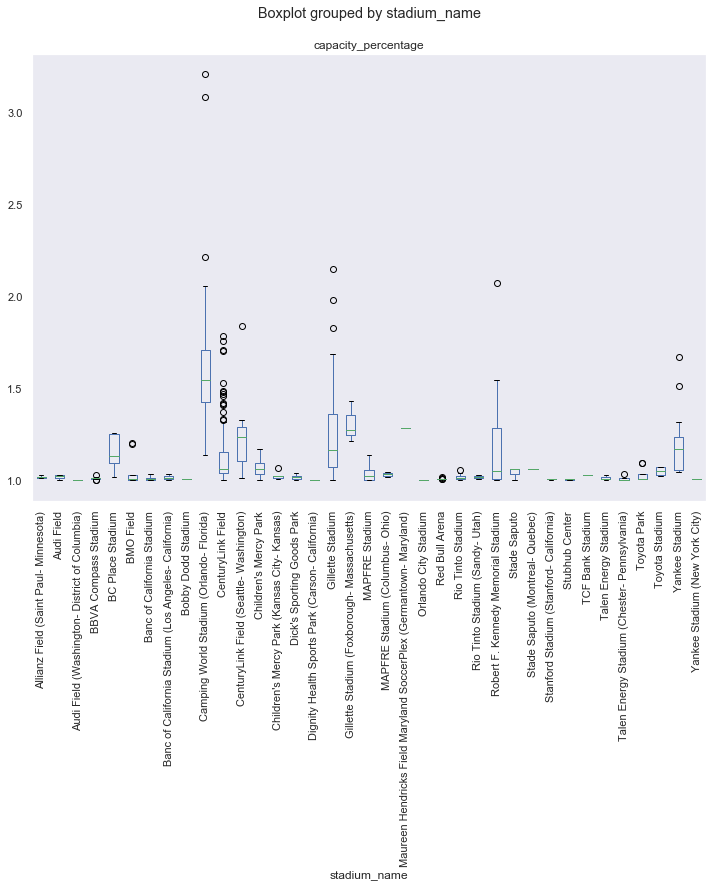

In [19]:
sorted.boxplot(by='stadium_name', 
                       column=['capacity_percentage'], 
                       grid=False,
                       rot=90)